<img style="float: left;" src="earth-lab-logo-rgb.png" width="150" height="150" />

# Earth Analytics Education - EA  Python Course Spring 2021

## Important  - Assignment Guidelines

1. Before you submit your assignment to GitHub, make sure to run the entire notebook with a fresh kernel. To do this first, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart & Run All)
2. Always replace the `raise NotImplementedError()` code with your code that addresses the activity challenge. If you don't replace that code, your notebook will not run.

```
# YOUR CODE HERE
raise NotImplementedError()
```

3. Any open ended questions will have a "YOUR ANSWER HERE" within a markdown cell. Replace that text with your answer also formatted using Markdown.
4. **DO NOT RENAME THIS NOTEBOOK File!** If the file name changes, the autograder will not grade your assignment properly.
6. When you create a figure, comment out `plt.show()` to ensure the autograder can grade your plots. For figure cells, DO NOT DELETE the code that says `DO NOT REMOVE LINE BELOW`.

```
### DO NOT REMOVE LINE BELOW ###
student_plot1_ax = nb.convert_axes(plt)
```

* Only include the package imports, code, and outputs that are required to run your homework assignment.
* Be sure that your code can be run on any operating system. This means that:
   1. the data should be downloaded in the notebook to ensure it's reproducible
   2. all paths should be created dynamically using the `os.path.join`

## Follow to PEP 8 Syntax Guidelines & Documentation

* Run the `autopep8` tool on all cells prior to submitting (HINT: hit shift + the tool to run it on all cells at once!
* Use clear and expressive names for variables. 
* Organize your code to support readability.
* Check for code line length
* Use comments and white space sparingly where it is needed
* Make sure all python imports are at the top of your notebook and follow PEP 8 order conventions
* Spell check your Notebook before submitting it.

For all of the plots below, be sure to do the following:

* Make sure each plot has a clear TITLE and, where appropriate, label the x and y axes. Be sure to include UNITS in your labels.


### Add Your Name Below 
**Your Name:** Rachel Michaels

<img style="float: left;" src="colored-bar.png"/>

---

# Week 04 and 05 Homework - Automate NDVI Workflow

For this assignment, you will write code to generate a plot of the mean normalized difference vegetation index (NDVI) for two different sites in the United States across one year of data:

* San Joaquin Experimental Range (SJER) in Southern California, United States
* Harvard Forest (HARV) in the Northeastern United States

The data that you will use for this week is available from **earthpy** using the following download: 

`et.data.get_data('ndvi-automation')`

## Assignment Goals

Your goal in this assignment is to create the most efficient and concise workflow that you can that allows for:

1. The code to scale if you added new sites or more time periods to the analysis.
2. Someone else to understand your workflow.
3. The LEAST and most efficient (i.e. runs fast, minimize repetition) amount of code that completes the task.

### HINTS

* Remove values outside of the landsat valid range of values as specified in the metadata, as needed.
* Keep any output files SEPARATE FROM input files. Outputs should be created in an outputs directory that is created in the code (if needed) and/or tested for.
* Use the functions that we demonstrated during class to make your workflow more efficient.
* BONUS - if you  chose - you can export your data as a csv file. You will get bonus points for doing this.


## Assignment Requirements

Your submission to the GitHub repository should include:
* This Jupyter Notebook file (.ipynb) with:
    * The code to create a plot of mean NDVI across a year for  2 NEON Field Sites:
        * NDVI on the x axis and formatted dates on the y for both NEON sites on one figure/axis object
    * The **data should be cleaned to remove the influence of clouds**. See the [earthdatascience website for an example of what your plot might look like with and without removal of clouds](https://www.earthdatascience.org/courses/earth-analytics-python/create-efficient-data-workflows/).
* BONUS: Create one output `.csv` file that has 3 columns - NDVI, Date and Site Name - with values for SJER and HARV.

Your notebook should:
* Have *at least* 2 well documented and well named functions with docstrings.
* Include a Markdown cell at the top of the notebook that outlines the overall workflow using pseudocode (i.e. plain language, not code)
* Include additional Markdown cells throughout the notebook to describe: 
    * the data that you used - and where it is from
    * how data are being processing
    * how the code is optimized to run fast and be more concise

# Replace this cell with your pseudocode  for this workflow

If you happen to be a diagram person a diagram is ok too



1.	Import required packages
2.	Download the data
3.	Set the working directory.
4.	Create paths to sites
5.	Create cloud mask – get the cloud pixel values from earthpy
6.	Create a function to extract site name and datetime from directory path names, using the path to the directory that contains the information of interest and the date and site name location within that directory path as index lists as the function parameters
7.	Create a function that will open, crop and specify valid ranges of a landsat band, using the path to the band, the cropping extent, and the valid range as function parameters
8.	Create dataframe of mean NDVI
    a.	Create an empty list that will hold site, date, and mean NDVI information
    b.	Create a for loop to loop through site paths
            i.	Get list of scene paths of both sites using glob
            ii.	Get shapefiles for each site using glob and pulling out index 0
            iii.	Open shapefiles
            iv.	Create a nested for loop to loop through each scene
                1.	Go through each scene directory and pull out date and site information using the function created earlier in the notebook
                2.	Go through each scene and create sorted list of bands in each scene using glob. Only bands 4 and 5 are needed for calculating NDVI
                3.	Go through each scene and get qa pixel layers using glob and pulling out index 0. This will pop out each qa pixel layer as the loop loops through each scene so that it's not in list form and can be worked with
                4.	Open the qa layer
                5.	Crop the qa layer using the shapefile opened in the first layer of the loop
                6.	Create an empty list that will hold bands 4 and 5 once they are cleaned and free of clouds
                7.	Create another for loop inside the already nested loop
                    a.	Clean the bands using the previously created function that will open the band, crop it using its associate shapefile, and specify landsat's valid range
                    b.	Apply cloud mask to band
                    c.	Append list so that it holds the cloud free bands. This list will be used to calculate mean NDVI
                8.	Calculate mean NDVI
                9.	Append the mean NDVI to the list holding the site information (the function that pulled site and date information from scene directory paths created a list as the output)
                10.	Append this list of lists to the empty list created outside the for loop at the top
9.	Convert list into a pandas dataframe
10.	Set index on date
11.	Create figure
    a.	Set figure space
    b.	Create overall figure title
    c.	Create a for loop to loop through dataframe and create individual dataframes grouped by site for plotting
    d.	Set axes labels
    e.	Format date on x axis
    f.	Create a legend
12.	Drop na values from dataframe for exporting
13.	Export pandas dataframe to .csv file
14. Create a figure that displays mean NDVI at the HARV and SJER locations over a year, with mean NDVI on the y-axis and the month on the x-axis using the pandas dataframe created in the previous step.

In [1]:
# Autograding imports - do not modify this cell
import matplotcheck.autograde as ag
import matplotcheck.notebook as nb
import matplotcheck.timeseries as ts
from datetime import datetime

In [2]:
# Import needed packages in PEP 8 order
# and no unused imports listed (10 points total)
import os
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd
import rioxarray as rxr
import xarray as xr
import geopandas as gpd
import earthpy as et
import earthpy.mask as em
from datetime import datetime
import numpy as np
from matplotlib.dates import DateFormatter

# Download the data
et.data.get_data('ndvi-automation')

# Create a path to the directory
directory_path = os.path.join(et.io.HOME, "earth-analytics", "data")

# Set working directory
os.chdir(directory_path)

In [3]:
# DO NOT MODIFY THIS CELL
# Tests that the working directory is set to earth-analytics/data

path = os.path.normpath(os.getcwd())
student_wd_parts = path.split(os.sep)

if student_wd_parts[-2:] == ['earth-analytics', 'data']:
    print("\u2705 Great - it looks like your working directory is set correctly to ~/earth-analytics/data")
else:
    print("\u274C Oops, the autograder will not run unless your working directory is set to earth-analytics/data")

✅ Great - it looks like your working directory is set correctly to ~/earth-analytics/data


In [4]:
# Create paths to sites
site_paths = glob(os.path.join("ndvi-automation", "sites", "*"))
site_paths

# Create cloud mask
# Get the cloud pixel values from earthpy
high_cloud_confidence = (
    em.pixel_flags["pixel_qa"]["L8"]["High Cloud Confidence"])
cloud = em.pixel_flags["pixel_qa"]["L8"]["Cloud"]
cloud_shadow = em.pixel_flags["pixel_qa"]["L8"]["Cloud Shadow"]

all_masked_values = cloud_shadow + cloud + high_cloud_confidence

# Figure 1: Plot 1 - Mean NDVI For Each Site Across the Year (50 points)

Create a plot of the mean normalized difference vegetation index (NDVI) for the two different sites in the United States across the year: 

* NDVI on the x axis and formatted dates on the y for both NEON sites on one figure/axis object.
* Each site should be identified with a different color in the plot and legend.
* The final plot **data should be cleaned to remove the influence of clouds**.
* Be sure to include appropriate title and axes labels.

Add additional cells as needed for processing data (e.g. defining functions, etc), but be sure to:
* follow the instructions in the code cells that have been provided to ensure that you are able to use the sanity check tests that are provided. 
* include only the plot code in the cell identified for the final plot code below

## Task 1: 

In the cell below, create a single dataframe containing MEAN NDVI, the site name, 
and the date of the data for the HARV site 
scene `HARV/landsat-crop/LC080130302017031701T1-SC20181023151837`.  The column names for the  final
DataFrame should be`mean_ndvi`, and `site`, and the data should be **indexed on the date**. 

Use the functions that we reviewed in class (or create your own versions of them) to implement your code

### In the Cell below Place  All Functions Needed to Run this Notebook (20 points)

In [5]:
### DO NOT REMOVE THIS LINE OR EDIT / MOVE THIS CELL ###
start_time = datetime.now()

Create functions to extract site name and datetime from directory path names and open, crop and specify valid ranges of a landsat band.

In [6]:
# In this cell place all of the functions needed to run your notebook
# You will be graded here on function application, docstrings, efficiency so ensure
# All functions are placed here!

# Function to extract sitename and datetime from directory path names
def extract_sitename_date(directory_path,
                          sitename_location,
                          datetime_location):
    """Extract sitename and datetime from directory path name.

    Parameters
    -----------
    directory_path : string
        A path to the directory name
    sitename_location : index list
        List of first and last index of the site name
    datetime_location : index list
        List of first and last index of the date


    Returns
    -----------
    list : list of site names and datetime information
    """
    # Create an empty list to append sitename and date information
    site_name_date_list = []

    # Assign datetime location to an object
    date_location = directory_path[datetime_location[0]: 
                                   datetime_location[1]]

    # Specify datetime format
    format = "%Y%m%d"

    # Use datetime and format to create date varibale
    date = datetime.strptime(date_location, format)

    # Assign sitename information to a variable
    site = directory_path[sitename_location[0]: sitename_location[1]]

    # Append site variable to list
    site_name_date_list.append(site)

    # Append date variable to list
    site_name_date_list.append(date)

    return site_name_date_list

# Function to clean landsat bands


def open_clean_bands(band_path,
                     crop_extent,
                     valid_range=None):
    """Open, crop and specify valid ranges of a landsat band.

    Parameters
    -----------
    band_path : string
        A path to the array to be opened
    valid_range : tuple (optional)
        A tuple of min and max range of values for the data. Default = None


    Returns
    -----------
    arr : xarray DataArray
        An xarray DataArray with values that should be masked set to 1 for True (Boolean)
    """
    # TODO add tests to ensure the arrays are the same .shape
    band = rxr.open_rasterio(band_path, masked=True).rio.clip(crop_extent.geometry,
                                                              from_disk=True).squeeze()

    # Only run this step if a valid range tuple is provided
    if valid_range:
        mask = ((band < valid_range[0]) | (band > valid_range[1]))
        band = band.where(~xr.where(mask, True, False))

    return band

In [7]:
# Create dataframe of mean NDVI in this cell using the functions created above
# Create path to HARV data
harv_path = os.path.join("ndvi-automation", "sites", "HARV")

# Open and clean all HARV bands
harv_scene_info = []

# Establish the scene directory path that is of interest
scene_path = sorted(glob(os.path.join(harv_path, "landsat-crop",
                      "LC080130302017031701T1-SC20181023151837")))
# Set the path to the associated shapefile
bound = os.path.join(harv_path, "vector", "HARV-crop.shp")
# Open the shapefile
harv_boundary = gpd.read_file(bound)

# Create a nested for loop to be able to work with each .tif file (band)
# in the scene, again this is necessary when working with multiple scenes
for tif in scene_path:
    # Get site and date info from the scene directory path
    site_info = extract_sitename_date(tif, [22, 26], [50, 58])
    # Grab bands 4 and 5 (these are the bands needed for calculating NDVI)
    harv_bands = sorted(glob(os.path.join(tif, "*band[4-5]*")))
    # Set the path to the qa layer in the scene directory
    qa_layer_path = os.path.join(tif,
                                     "LC08_L1TP_013030_20170317_20170328_01_T1_pixel_qa.tif")
    # Open the qa layer
    opened_layer = rxr.open_rasterio(qa_layer_path, masked=True)
    # Crop the qa layer using the boundary associated with the scene and
    # opened in a previous step
    cropped_layer = opened_layer.rio.clip(harv_boundary.geometry).squeeze()

    # Create an empty list to store bands after they are cleaned of clouds
    tif_bands = []
    # Create an additional loop that is nested inside the other two that will
    # be used to work with each band inside the scene directory
    for a_band in harv_bands:
        # Clean the band using the previously created function
        # The function opens, crops, and sets landsat's valid range
        clean_band = open_clean_bands(
            a_band, harv_boundary, valid_range=(0, 10000))
        # Apply the cloud mask to the clean band
        cloud_free_band = clean_band.where(
            ~cropped_layer.isin(all_masked_values))
        # The band to the empty list that will be used to calculate mean NDVI
        tif_bands.append(cloud_free_band)

    # Calculate mean NDVI using the list that is storing the clean bands
    # that are free of clouds
    mean_ndvi = np.nanmean(
        (tif_bands[1]-tif_bands[0]) / (tif_bands[1]+tif_bands[0]))
    # Append the mean NDVI to the list that was the result of the function
    # that grabbed site and date information from the scene directory path name
    site_info.append(mean_ndvi)
    # Append this lists of lists to the list outside of the nested for 
    # loops at the top
    harv_scene_info.append(site_info)

# Convert list into a pandas dataframe
harv_info_df = pd.DataFrame(harv_scene_info, columns=[
                            "site", "date", "mean_ndvi"])

# Set index
harv_date_as_index = harv_info_df.set_index("date")

# Call dataframe
harv_date_as_index

,site,mean_ndvi
date,,
2017-03-17,HARV,0.281132


In [8]:
# This cell  is testing your data output above

student_ndvi_ts_single_site = _

single_scene_points = 0

# Ensure the data is stored in a dataframe.
if isinstance(student_ndvi_ts_single_site, pd.DataFrame):
    print('\u2705 Your data is stored in a DataFrame!')
    single_scene_points += 1
else:
    print('\u274C It appears your data is not stored in a DataFrame. ',
          'To see what type of object your data is stored in, check its type with type(object)')

# Ensure that the date column is the index
if isinstance(student_ndvi_ts_single_site.index, pd.core.indexes.datetimes.DatetimeIndex):
    print('\u2705 You have the index set to the date column!')
    single_scene_points += 2
else:
    print('\u274C You do not have the index set to the date column.')

# Ensure that the date column is datetime
if isinstance(student_ndvi_ts_single_site.index[0], pd._libs.tslibs.timestamps.Timestamp):
    print('\u2705 The data in your date column is datetime!')
    single_scene_points += 2
else:
    print('\u274C The data in your date column is not datetime.')

# Ensure the site name is correct
if student_ndvi_ts_single_site.site.values[0] == 'HARV':
    print('\u2705 You have the correct site name!')
    single_scene_points += 5
else:
    print('\u274C You do not have the correct site name.')

if np.allclose(0.281131628228094, student_ndvi_ts_single_site.mean_ndvi.values[0]):
    print('\u2705 You have the correct mean NDVI value!')
    single_scene_points += 5
else:
    print('\u274C You do not have the correct mean ndvi value.')

print("\n \u27A1 You received {} out of 15 points for creating a dataframe.".format(
    single_scene_points))
single_scene_points

✅ Your data is stored in a DataFrame!
✅ You have the index set to the date column!
✅ The data in your date column is datetime!
✅ You have the correct site name!
✅ You have the correct mean NDVI value!

 ➡ You received 15 out of 15 points for creating a dataframe.


15

## Task 2:

In the cell below, process all of the landsat scenes. Create a DataFrame that contains the following 
information for each scene


|   | index  | site  | mean_ndvi  | 
|---|---|---|---|
| Date  |   |   |   |
|  2017-01-07  | 0  | SJER  | .4  |  

Be sure to call your dataframe at the end of the cell to ensure autograding works.
HINT: FOR THIS STEP, leave any rows containing missing values (`NAN`).

1. Create dataframe of mean NDVI a. Create an empty list that will hold site, date, and mean NDVI information b. Create a for loop to loop through site paths
        i.    Get list of scene paths of both sites using glob
        ii.    Get shapefiles for each site using glob and pulling out index 0
        iii.    Open shapefiles
        iv.    Create a nested for loop to loop through each scene
            1.    Go through each scene directory and pull out date and site information using the function created earlier in the notebook
            2.    Go through each scene and create sorted list of bands in each scene using glob. Only bands 4 and 5 are needed for calculating NDVI
            3.    Go through each scene and get qa pixel layers using glob and pulling out index 0. This will pop out each qa pixel layer as the loop loops through each scene so that it's not in list form and can be worked with
            4.    Open the qa layer
            5.    Crop the qa layer using the shapefile opened in the first layer of the loop
            6.    Create an empty list that will hold bands 4 and 5 once they are cleaned and free of clouds
            7.    Create another for loop inside the already nested loop
                a.    Clean the bands using the previously created function that will open the band, crop it using its associate shapefile, and specify landsat's valid range
                b.    Apply cloud mask to band
                c.    Append list so that it holds the cloud free bands. This list will be used to calculate mean NDVI
            8.    Calculate mean NDVI
            9.    Append the mean NDVI to the list holding the site information (the function that pulled site and date information from scene directory paths created a list as the output)
            10.    Append this list of lists to the empty list created outside the for loop at the top
            
The below cell runs quickly and efficiently by using loops and functions to process data, which minimize repetition.

In [9]:
# Create dataframe of NDVI including the cleaning data to deal with clouds

# Create an empty list that will hold site, date, and mean ndvi information
all_site_info = []

# Create a for loop to loop through site paths
for site in site_paths:
    # Get list of scene paths of both sites using glob
    dirs = glob(os.path.join(site, "landsat-crop", "*"))
    # Get shapefiles for each site using glob and pulling out index 0
    bounds = glob(os.path.join(site, "vector", "*-crop.shp"))[0]
    # Open shapefiles
    opened_bound = gpd.read_file(bounds)

    # Create a nested for loop to loop through each scene
    for all_dirs in dirs:
        # Go through each scene directory and pull out date and site
        # information using the function created earlier in the notebook
        site_info = extract_sitename_date(all_dirs, [22, 26], [50, 58])
        # Go through each scene and create sorted list of bands in each scene
        # using glob. Only bands 4 and 5 are needed for calculating NDVI
        scene_bands = sorted(glob(os.path.join(all_dirs, "*band[4-5]*")))
        # Go through each scene and get qa pixel layers using glob and pulling
        # out index 0. This will pop out each qa pixel layer as the loop loops
        # through each scene so that it's not in list form and can be worked with
        qa_layer_paths = glob(os.path.join(all_dirs, "*pixel_qa*"))[0]
        # Open the qa layer
        opened_layer = rxr.open_rasterio(qa_layer_paths, masked=True)
        # Crop the qa layer using the shapefile opened in the first layer of
        # the loop
        cropped_layer = opened_layer.rio.clip(opened_bound.geometry).squeeze()

        # Create an empty list that will hold bands 4 and 5 once they are
        # cleaned and free of clouds
        site_bands = []

        # Create another for loop inside the already nested loop
        for band in scene_bands:
            # Clean the bands using the previously created function that will
            # open the band, crop it using its associate shapefile, and specify
            # landsat's valid range
            clean_band = open_clean_bands(
                band, opened_bound, valid_range=(0, 10000))
            # Apply cloud mask to band
            cloud_free_band = clean_band.where(
                ~cropped_layer.isin(all_masked_values))
            # Append list so that it holds the cloud free bands. This list will
            # be used to calculate mean NDVI
            site_bands.append(cloud_free_band)

        # Calculate mean NDVI
        mean_ndvi = np.nanmean(
            (site_bands[1]-site_bands[0]) / (site_bands[1]+site_bands[0]))
        # Append the mean NDVI to the list holding the site information (the
        # function that pulled site and date information from scene directory
        # paths created a list as the output)
        site_info.append(mean_ndvi)
        # Append this list of lists to the empty list created outside the for
        # loop at the top
        all_site_info.append(site_info)

# Convert list into a pandas dataframe
site_info_df = pd.DataFrame(all_site_info, columns=[
                            "site", "date", "mean_ndvi"])

# Set index on date
indexed_site_info_df = site_info_df.set_index("date")

# Call dataframe
indexed_site_info_df

C:\Users\Rachel\AppData\Local\Temp/ipykernel_9064/122541231.py:52: RuntimeWarning: Mean of empty slice
  mean_ndvi = np.nanmean(
C:\Users\Rachel\AppData\Local\Temp/ipykernel_9064/122541231.py:52: RuntimeWarning: Mean of empty slice
  mean_ndvi = np.nanmean(
C:\Users\Rachel\AppData\Local\Temp/ipykernel_9064/122541231.py:52: RuntimeWarning: Mean of empty slice
  mean_ndvi = np.nanmean(
C:\Users\Rachel\AppData\Local\Temp/ipykernel_9064/122541231.py:52: RuntimeWarning: Mean of empty slice
  mean_ndvi = np.nanmean(
C:\Users\Rachel\AppData\Local\Temp/ipykernel_9064/122541231.py:52: RuntimeWarning: Mean of empty slice
  mean_ndvi = np.nanmean(
C:\Users\Rachel\AppData\Local\Temp/ipykernel_9064/122541231.py:52: RuntimeWarning: Mean of empty slice
  mean_ndvi = np.nanmean(
C:\Users\Rachel\AppData\Local\Temp/ipykernel_9064/122541231.py:52: RuntimeWarning: Mean of empty slice
  mean_ndvi = np.nanmean(
C:\Users\Rachel\AppData\Local\Temp/ipykernel_9064/122541231.py:52: RuntimeWarning: Mean of empty 

,site,mean_ndvi
date,,
2017-01-12,HARV,NaN
2017-01-28,HARV,NaN
2017-02-13,HARV,NaN
2017-03-01,HARV,NaN
2017-03-17,HARV,0.281132
2017-04-02,HARV,0.251133
2017-04-18,HARV,0.541080
2017-05-04,HARV,0.568924
2017-05-20,HARV,0.811310


In [10]:
# Last sanity check before creating your plot (10 points)

# Ensure that you call your dataframe at the bottom of the cell above
# and that it has columns called: mean_ndvi and site

# Ensure the data is stored in a dataframe.
student_ndvi_df = _

df_points = 0

if isinstance(student_ndvi_df, pd.DataFrame):
    print('\u2705 Your data is stored in a DataFrame!')
    df_points += 2
else:
    print('\u274C It appears your data is not stored in a DataFrame. ',
          'To see what type of object your data is stored in, check its type with type(object)')

# Check that dataframe contains the appropriate number of NAN values
if student_ndvi_df.mean_ndvi.isna().sum() == 15:
    print('\u2705 Correct number of masked data values!')
    df_points += 2
else:
    print('\u274C The amount of null data in your dataframe is incorrect.')


# Ensure that the date column is the index
if isinstance(student_ndvi_df.index, pd.core.indexes.datetimes.DatetimeIndex):
    print('\u2705 You have the index set to the date column!')
    df_points += 3
else:
    print('\u274C You do not have the index set to the date column.')

# Ensure that the date column is datetime
if isinstance(student_ndvi_df.index[0], pd._libs.tslibs.timestamps.Timestamp):
    print('\u2705 The data in your date column is datetime!')
    df_points += 3
else:
    print('\u274C The data in your date column is not datetime.')

# Output for timer, # DO NOT MODIFY
end_time = datetime.now()
total_time = end_time - start_time
print(
    "Your total run time for processing the data was {0}.".format(total_time))

print("\n \u27A1 You received {} out of 10 points for creating a dataframe.".format(
    df_points))

df_points

✅ Your data is stored in a DataFrame!
✅ Correct number of masked data values!
✅ You have the index set to the date column!
✅ The data in your date column is datetime!
Your total run time for processing the data was 0:00:24.302815.

 ➡ You received 10 out of 10 points for creating a dataframe.


10

Create a figure that displays mean NDVI at the HARV and SJER locations over a year, with mean NDVI on the y-axis and the month on the x-axis using the pandas dataframe created above.

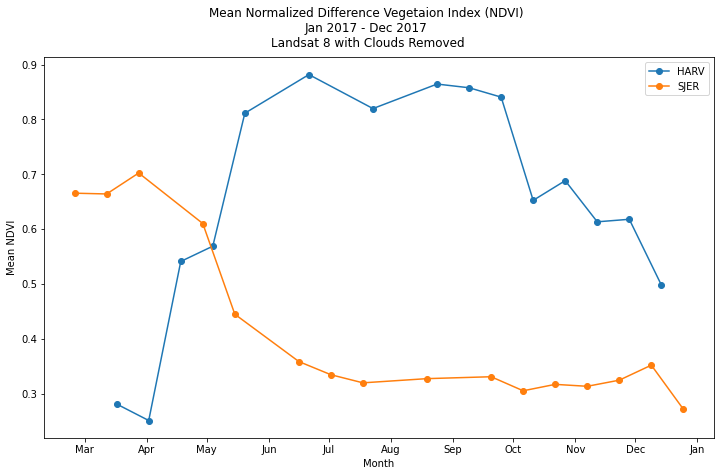

In [11]:
# Add only the plot code to this cell

# Set figure space
fig, ax = plt.subplots(figsize=(12, 7))

# Create overall figure title
fig.suptitle(
    "Mean Normalized Difference Vegetaion Index (NDVI) \nJan 2017 - Dec 2017 \nLandsat 8 with Clouds Removed")

# Create a for loop to loop through dataframe and create individual dataframes
# grouped by site for plotting
for site, site_name_df in indexed_site_info_df.dropna().groupby("site"):
    ax.plot(site_name_df.index, site_name_df.mean_ndvi, marker="o", label=site)

# Set axes labels
ax.set(xlabel="Month",
       ylabel="Mean NDVI")

# Format date on x axis
ax.xaxis.set_major_formatter(DateFormatter("%b"))

# Create a legend
ax.legend()

### DO NOT REMOVE LINES BELOW ###
final_masked_solution = nb.convert_axes(plt, which_axes="current")

In [12]:
# Ignore this cell for the autograding tests

In [13]:
# Ignore this cell for the autograding tests

# Question 1 (10 points)

Imagine that you are planning NEON’s upcoming flight season to capture remote sensing data in these locations and want to ensure that you fly the area when the vegetation is the most green.

When would you recommend the flights take place for each site? 

Answer the question in 2-3 sentences in the Markdown cell below.

I would recommend that the flights take place in April for the SJER site. I would recommend that HARV flights take place in July.

# Question 2 (10 points)

How could you modify your workflow to look at vegetation changes over time in each site? 

Answer the question in 2-3 sentences in the Markdown cell below.

I could possibly create NDVI difference maps to examine changes between time points (months, years, etc.). Due to the way my code is set up, I could also continue to add data to the HARV and SJER directories as it becomes available and run this same code to continue to monitor changes.

# Do not edit this cell! (10 points)

The notebook includes:
* additional Markdown cells throughout the notebook to describe: 
    * the data that you used - and where it is from
    * how data are being processing
    * how the code is optimized to run fast and be more concise

# Do not edit this cell! (20 points)

The notebook will also be checked for overall clean code requirements as specified at the **top** of this notebook. Some of these requirements include (review the top cells for more specifics): 

* Notebook begins at cell [1] and runs on any machine in its entirety.
* PEP 8 format is applied throughout (including lengths of comment and code lines).
* No additional code or imports in the notebook that is not needed for the workflow.
* Notebook is fully reproducible. This means:
   * reproducible paths using the os module.
   * data downloaded using code in the notebook.
   * all imports at top of notebook.

## BONUS - Export a  .CSV File to Share (10 points possible)

This is optional - if you export a **.csv** file with the columns specified above: Site, Date and NDVI Value you can get an additional 10 points.

* FULL CREDIT: File exists in csv format and contains the columns specified.
We will check your github repo for this file!


In [14]:
# Drop na values from dataframe for exporting
no_nan_df = indexed_site_info_df.dropna()

# Export pandas dataframe to csv file
# Reproducible output
no_nan_df.to_csv(os.path.join(directory_path, "ndvi-automation", "outputs", 
                              "ndvi_df.csv"))

# Export to my local repository
# no_nan_df.to_csv(os.path.join(et.io.HOME, "earth-analytics",
#                               "2022_spring",
#                               "assignments",
#                               "04_assignment",
#                               "ea-2022-04-ndvi-automation-rami8797",
#                               "ndvi_df.csv"))